# Module 3 - Final Project

# PROJECT GOAL  
The goal of this project is to test your ability to gather information from a real-world database
and use your knowledge of statistical analysis and hypothesis testing to generate analytical
insights that can be meaningful to the company/stakeholder.  

# STATISTICAL ANALYSIS REQUIREMENTS  
For this project, you will need data to perform a statistical analysis. In the statistical analysis,
you'll need to perform hypothesis tests to answer at least three questions from the data source
you choose.  
For each hypothesis, be sure to specify both the null hypothesis and the alternative hypothesis
for your question. Also, describe what statistical test you will use to test the hypothesis.
(independent t-test, dependent t-test, ANOVA etc.).

# The Project

For this project I have used data about the video game industry from Kaggle (Video Game Sales with Ratings
Video game sales from Vgchartz and corresponding ratings from Metacritic by Rush Kirubi https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings), which was gathered from VGCHARTZ (http://www.vgchartz.com/gamedb/) and MetaCritic (https://www.metacritic.com/browse/games/release-date/available) using BeautifulSoup.  
I will ask 3 meaningful questions which will help my stakeholder to have a better understanding of the gaming industry.

# Visualizations

In this notebook I have gathered the extra visualizations I made in order to better understand my data.

# Given data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy
from statsmodels.formula.api import ols

# display options
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')
# sns.set_context('poster')

In [3]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(df.shape)
df.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
# check Datatypes
df_dtype = df.dtypes.reset_index()
df_dtype.columns = ['Count', 'Column Type']
df_dtype

,Count,Column Type
0,Name,object
1,Platform,object
2,Year_of_Release,float64
3,Genre,object
4,Publisher,object
5,NA_Sales,float64
6,EU_Sales,float64
7,JP_Sales,float64
8,Other_Sales,float64
9,Global_Sales,float64


# Data Cleaning

Check NaN values and deal with them, use integers for certain columns, rename columns, check for duplicates

In [7]:
# check NaN values
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
# create df for missing values
# find percentage of NaN values
df_missing = (df.isna().mean().round(4) * 100).reset_index()
df_missing.columns = ['column','percentage']
df_missing = df_missing.sort_values(by = 'percentage')
df_missing

,column,percentage
1,Platform,0.00
5,NA_Sales,0.00
6,EU_Sales,0.00
7,JP_Sales,0.00
8,Other_Sales,0.00
9,Global_Sales,0.00
0,Name,0.01
3,Genre,0.01
4,Publisher,0.32
2,Year_of_Release,1.61


In [9]:
# prepare to plot missing values
df_missing = df.isna().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.sort_values(by='missing_count')

Text(0.5, 1.0, 'Number of NaN values in each column')

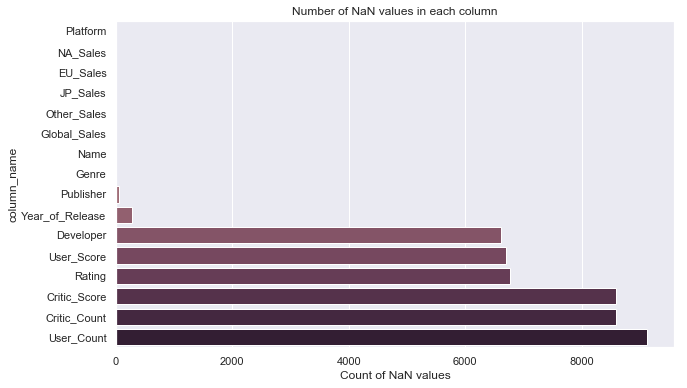

In [10]:
# visualize amount of missing values
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='missing_count', y='column_name', palette='ch:.25', data = df_missing)
ax.set_xlabel('Count of NaN values')
ax.set_title('Number of NaN values in each column')

In [11]:
# create a df cleaned from columns containing more than 50% NaN values
df_missing = (df.isna().sum()/len(df)).reset_index()
df_missing.columns = ['column','proportion']
df_missing = df_missing.sort_values(by = 'proportion')

missingvaluescols = df_missing[df_missing['proportion'] > 0.40].column.tolist()
df_clean = df.drop(missingvaluescols, axis=1)
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [12]:
# check the difference between the original df and the cleaned df 
print(df.shape)
print(df_clean.shape)

(16719, 16)
(16719, 11)


In [13]:
# use the new cleaned df
df = df_clean
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


Rename a few columns for a better working flow

In [14]:
# rename columns
# use integer for Year and Global sales columns
df = df.rename(columns={'Year_of_Release': 'Year', 'NA_Sales': 'USA', 'EU_Sales': 'EU', 'JP_Sales': 'JP', 'Other_Sales': 'Other', 'Global_Sales': 'Global'})
df = df[df['Year'].notnull()]
df = df[df['Genre'].notnull()]
df['Year'] = df['Year'].apply(int)
df['Global'] = df['Global'].apply(int)
df.head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,Developer
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31,NaN


Also I am getting rid of the Developer column, because of the NaN values and because I can use just the Publisher column

In [15]:
# drop 'Developer'
df = df.drop(columns=['Developer'])
df.head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31


In [16]:
# check for duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global


This dataset was released in 2016, and it has dates after 2017 until 2020 indicating the games which will be released at that dates. For a more accurate dataset I'm not using games after 2017 because I don't have relieble data about their actual release.

In [17]:
df = df[df['Year'] <= 2016.0]
# sorted(df.Year.unique())

In [18]:
df.groupby('Genre').sum()

,Year,USA,EU,JP,Other,Global
Genre,,,,,,
Action,6640613,863.17,510.99,160.14,182.22,889
Adventure,2596685,101.52,63.20,52.24,16.37,72
Fighting,1677895,220.51,99.00,87.28,35.87,221
Misc,3454612,399.57,210.60,107.02,73.10,398
Platform,1759387,444.44,199.39,130.71,51.01,572
Puzzle,1140976,121.13,49.78,56.68,12.30,134
Racing,2457964,356.86,234.49,56.63,75.51,415
Role-Playing,2972541,330.04,188.24,353.39,59.41,561
Shooter,2599819,584.83,314.52,38.68,103.33,673


Text(0.5, 1.0, 'Global Sales by Genre')

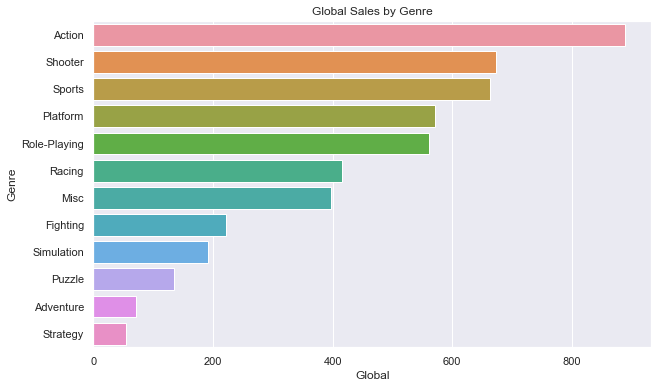

In [19]:
# Genre sales
plt.figure(figsize = (10,6))
x = df.groupby('Genre', as_index = False).sum().sort_values(by = 'Global', ascending = False)
sns.barplot(x = 'Global',
            y = 'Genre', data = x, orient = 'h')
plt.title('Global Sales by Genre')
#action games dominate the market

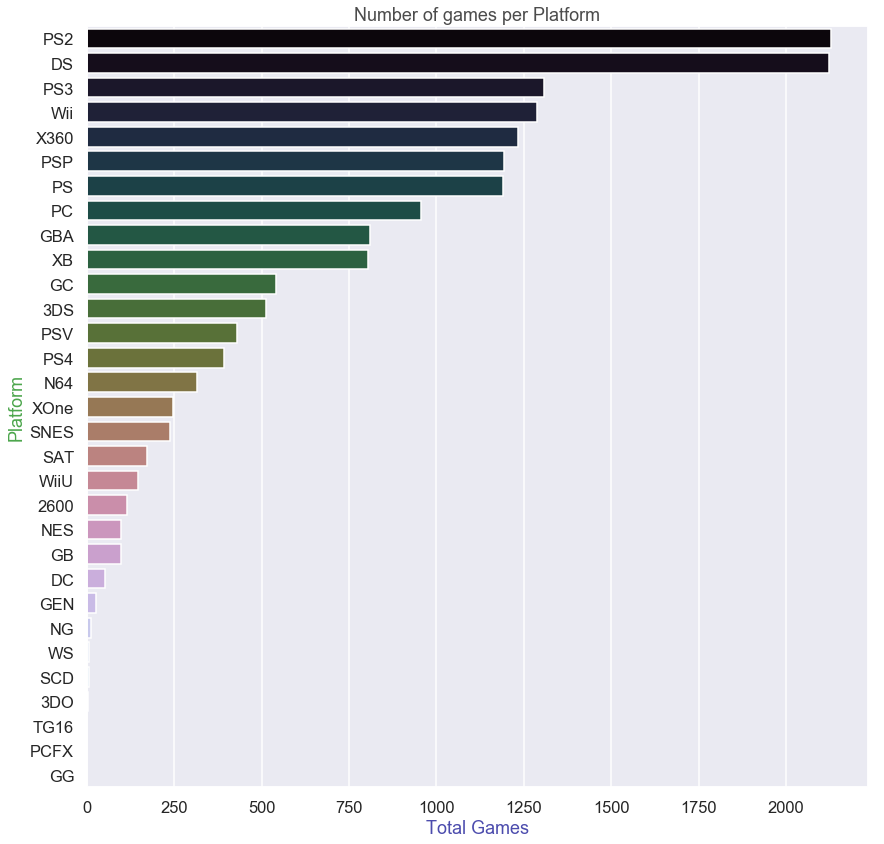

In [67]:
# check number of games/platform
sns.set_context('talk')
platform_name = df.Platform.value_counts()

plt.subplots(figsize=(14,14))
ax = sns.barplot(x=platform_name , y=platform_name .index, palette='cubehelix')
ax.set_title('Number of games per Platform', color='black', alpha=0.7)
ax.set_xlabel('Total Games', color='darkblue', alpha=0.7)
ax.set_ylabel('Platform', color='green', alpha=0.7)

plt.show()

Text(0.5, 0, 'Number of Releases')

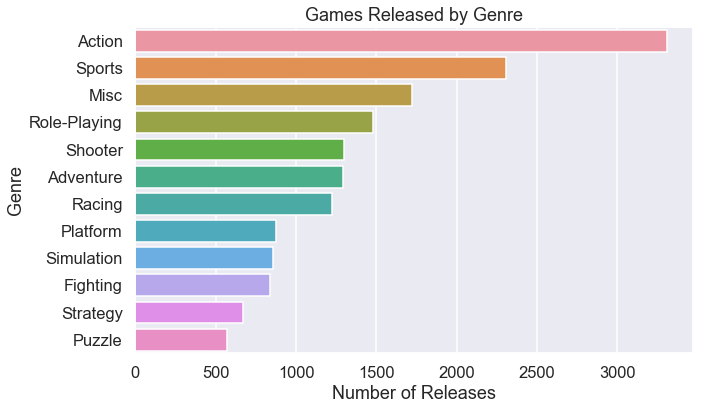

In [68]:
# Genre by Total Number of Releases
dfplot = df.groupby('Genre' , as_index = False)[['Name', 'Global']].agg({'Name' : 'count'
                                                                                ,'Global' : 'sum'})
dfplot.columns = ['Genre','Releases','Global']
dfplot.sort_values(by = 'Releases', ascending = False, inplace = True)
plt.figure(figsize = (10,6))
plt.title('Games Released by Genre')

ax = sns.barplot(x = 'Releases', y = 'Genre', data = dfplot, orient = 'h')

ax.set_xlabel('Number of Releases')

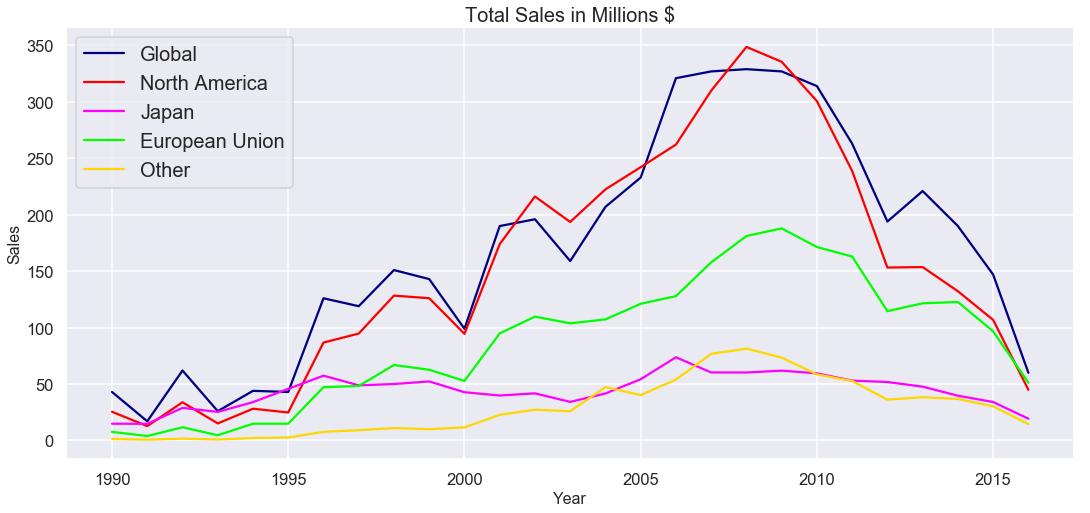

In [69]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_axes([0,0,1,1])
x = df.groupby('Year', as_index = False).sum()
x = x[x['Year'] >= 1990]

sns.lineplot(x = 'Year', y = 'Global', data = x, color = 'navy', label = 'Global', ax = ax)
sns.lineplot(x = 'Year', y = 'USA', data = x, color = 'red', label = 'North America', ax = ax)
sns.lineplot(x = 'Year', y = 'JP', data = x, color = 'magenta', label = 'Japan', ax = ax)
sns.lineplot(x = 'Year', y = 'EU', data = x, color = 'lime', label = 'European Union', ax = ax)
sns.lineplot(x = 'Year', y = 'Other', data = x, color = 'gold', label = 'Other', ax = ax)


ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Sales', fontsize = 16)
ax.tick_params(axis='both', which='major')

#plt.xticks(fontsize = 15, rotation = 90)
ax.set_title('Total Sales in Millions $', fontsize = 20)
plt.legend(fontsize = 20)

Text(0.5, 1.0, 'Global Sales by Platform in USD million')

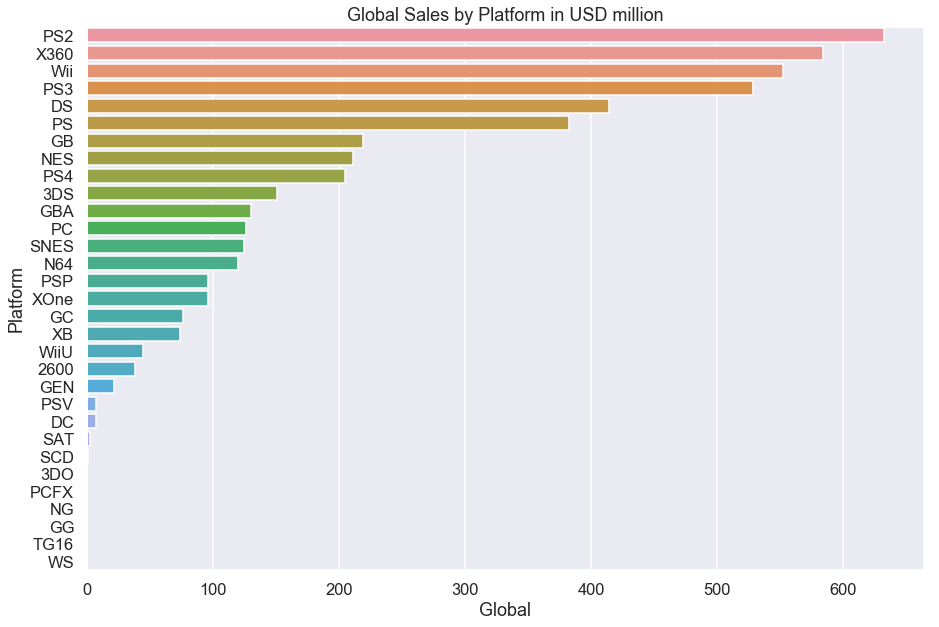

In [70]:
#Platform sales
plt.figure(figsize = (15,10))
x = df.groupby('Platform', as_index = False).sum().sort_values(by = 'Global', ascending = False)
sns.barplot(x = 'Global',
            y = 'Platform', data = x, orient = 'h')
plt.title('Global Sales by Platform in USD million')
#ps2 dominates the market

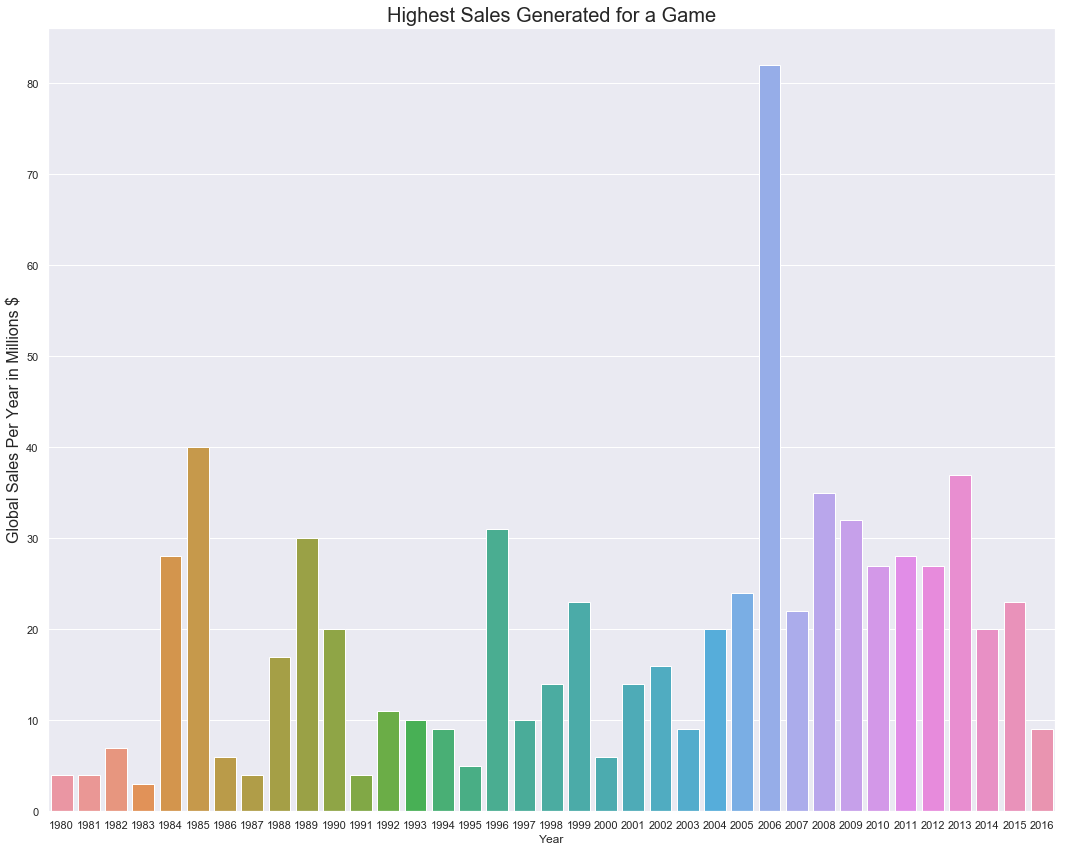

In [73]:
# highest Sales by Game
sns.set_context('notebook')
tbl = df.groupby(['Year','Name'],as_index=False)['Global'].sum().sort_values(by ='Year')
tbl = tbl[tbl['Global'] == tbl.groupby(['Year'])['Global'].transform(max)]
plt.figure(figsize=(15,12))
tbl['Year'] = tbl['Year'].astype(np.int64)

ax = sns.barplot(x = 'Year',y = 'Global', data = tbl)
ax.set_ylabel(ylabel='Global Sales Per Year in Millions $', fontsize=16)
ax.set_title(label='Highest Sales Generated for a Game', fontsize=20)
plt.tight_layout()

In [74]:
# platforms = {'Playstation : [PS, PS2, PS3, PS4],
#             Xbox : [XB, X360, XOne], 
#             PC : [PC],
#             Nintendo : [Wii, WiiU],
#             Portable : [GB, GBA, GC, DS, 3DS, PSP, PSV]}

# Playstation     == 1
# Xbox            == 2
# PC              == 3
# Nintendo        == 4
# Portable        == 5

In [75]:
def platforms(platform):
    if platform in ['PS', 'PS2', 'PS3', 'PS4']:
        return 1
    elif platform in ['XB', 'X360', 'XOne']:
        return 2
    elif platform in ['PC']:
        return 3
    elif platform in ['Wii', 'WiiU']:
        return 4
    else:
        return 5

In [76]:
df['PlatformCategory'] = df.Platform.apply(platforms)

In [77]:
df.head(2)

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,4
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,5


In [30]:
df_numbers = df.drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'PlatformCategory'], axis=1)
df_numbers.head()

,USA,EU,JP,Other,Global
0,41.36,28.96,3.77,8.45,82
1,29.08,3.58,6.81,0.77,40
2,15.68,12.76,3.79,3.29,35
3,15.61,10.93,3.28,2.95,32
4,11.27,8.89,10.22,1.00,31


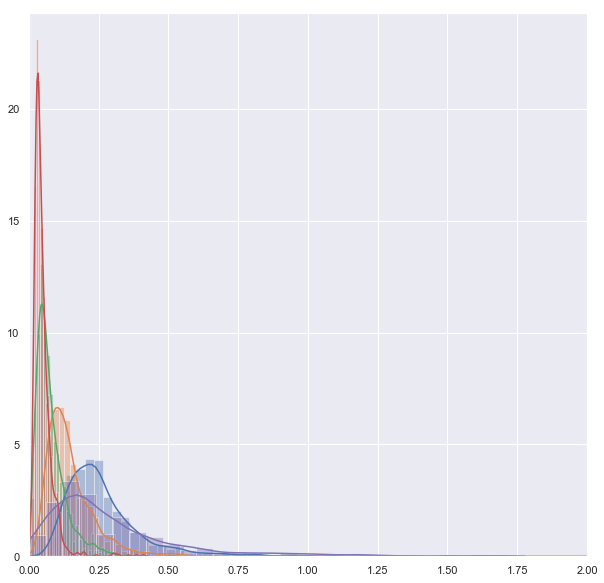

In [38]:
list_column = ['USA','EU','JP','Other','Global']

plt.figure(figsize=(10,10))
plt.xlim(0,2)
for country in list_column:
    sns.distplot(create_sample_distribution(df[country]))

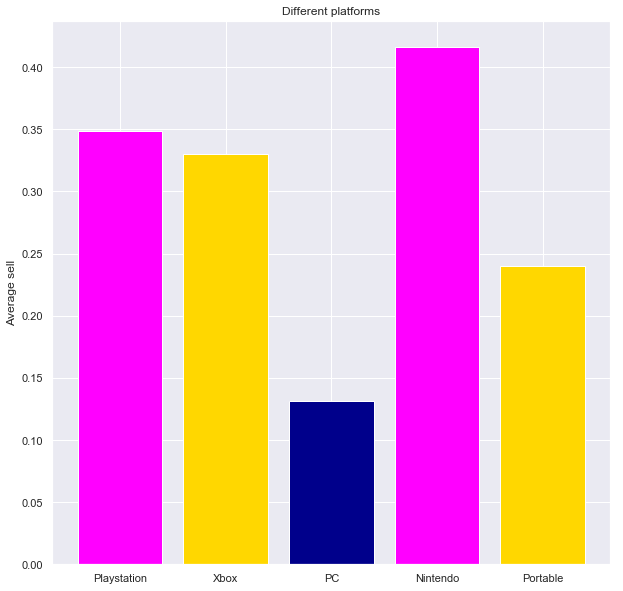

In [79]:
playstation = df['Global'][df['PlatformCategory'] == 1]
xbox = df['Global'][df['PlatformCategory'] == 2]
pc = df['Global'][df['PlatformCategory'] == 3]
nintendo = df['Global'][df['PlatformCategory'] == 4]
portable = df['Global'][df['PlatformCategory'] == 5]
x = ['Playstation', 'Xbox', 'PC', 'Nintendo', 'Portable']
y = [playstation.mean(), xbox.mean(), pc.mean(), nintendo.mean(), portable.mean()]

plt.figure(figsize=(10,10))
plt.bar(x, y, color = ('magenta', 'gold', 'darkblue'))
plt.title('Different platforms')
plt.ylabel('Average sell')
plt.show()

In [51]:
df.Genre.value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: Genre, dtype: int64

In [80]:
df[df.Genre == 'Shooter'].head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28,5
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.04,4.24,0.13,1.32,14,2
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14,1
32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.70,3.68,0.11,1.13,14,2
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.73,0.65,2.42,13,1


In [81]:
df[df.Genre == 'Action'].head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21,1
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20,1
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16,2
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16,1
38,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13,1


In [82]:
df.groupby('Year')['USA'].sum().tail()

Year
2012    153.26
2013    153.65
2014    132.27
2015    106.86
2016     44.93
Name: USA, dtype: float64

In [83]:
df.sort_values('USA', ascending=False)

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,4
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,5
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28,5
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30,5
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35,4
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32,4
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21,2
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28,4
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28,4
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20,5


In [84]:
df.sort_values(['Year','USA'],ascending=[True,False])

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
262,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4,5
546,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2,5
1764,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1,5
1968,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1,5
2650,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0,5
4019,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,0,5
5360,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0,5
6301,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0,5
6876,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0,5
240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4,5


In [85]:
df[df.Publisher == 'Atari']

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
89,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7,5
223,Driver 2,PS,2000,Action,Atari,2.36,2.10,0.02,0.25,4,1
262,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4,5
430,Enter the Matrix,PS2,2003,Action,Atari,1.78,1.12,0.09,0.19,3,1
451,Dragon Ball Z: Budokai,PS2,2002,Fighting,Atari,2.17,0.28,0.55,0.08,3,1
474,Dragon Ball Z: Budokai Tenkaichi 3,PS2,2007,Fighting,Atari,1.15,0.00,0.76,1.09,3,1
489,Pac-Man Collection,GBA,2001,Puzzle,Atari,2.07,0.77,0.05,0.05,2,5
546,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2,5
648,Dragon Ball Z: Budokai 2,PS2,2003,Fighting,Atari,1.63,0.22,0.51,0.06,2,1
866,E.T.: The Extra Terrestrial,2600,1981,Action,Atari,1.84,0.11,0.00,0.02,1,5


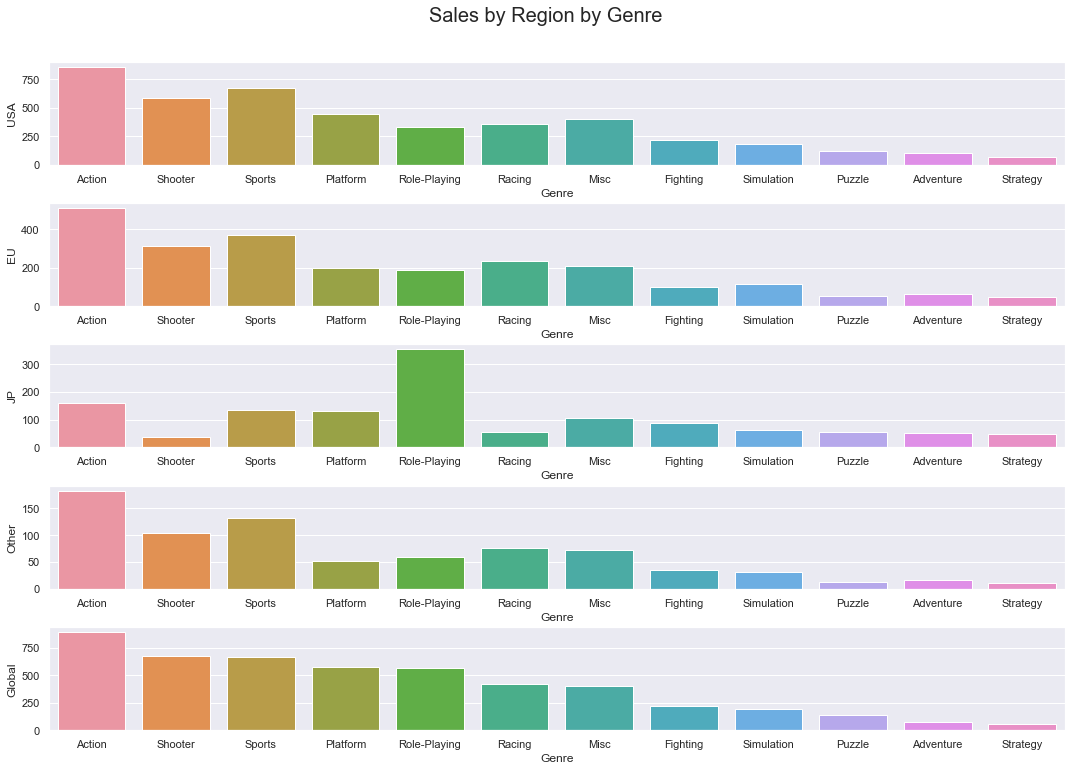

In [86]:
#sales by region by genre
dfplot = df.groupby('Genre', as_index = False).sum().sort_values(by = 'Global', ascending = False)
region = ['USA','EU','JP','Other','Global']

fig, axes = plt.subplots(nrows = len(region), ncols = 1, figsize = (15,10))
plt.tight_layout()
plt.suptitle('Sales by Region by Genre', fontsize = 20, y = 1.05)

for i, r in enumerate(region):
    sns.barplot(y = r , x = 'Genre' , data = dfplot,  orient='v' , ax= axes[i])
    

In [87]:
# Playstation     == 1
# Xbox            == 2
# PC              == 3
# Nintendo        == 4
# Portable        == 5

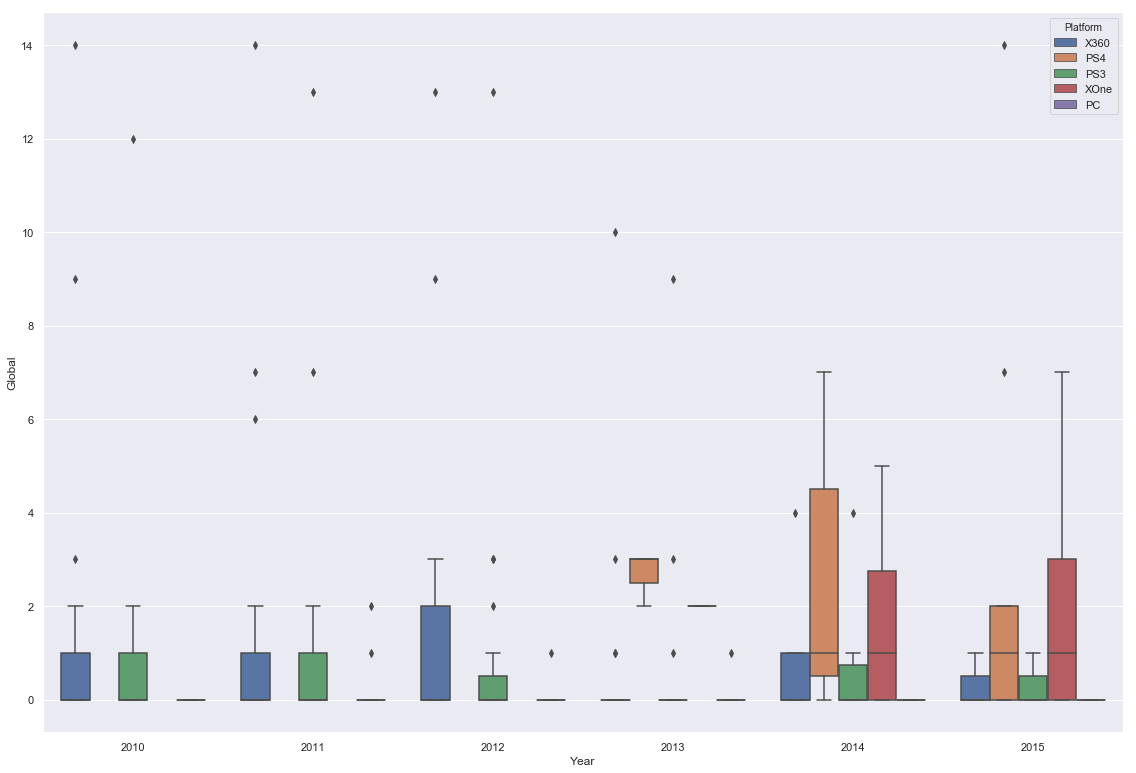

In [88]:
#most popular platformer for shooter
tbl = df[(df['Year'] >= 2010) & (df['Year'] <= 2015)]
platformlist = tbl[(tbl['Genre']) == 'Shooter'].groupby('Platform', as_index = False)[['Platform','Global']].sum().sort_values(by = 'Global'
                                                                                      ,ascending = False).iloc[:5,0]
ax = plt.figure(figsize=(15,10)).add_axes([0,0,1,1])
tbl = tbl[(tbl['Platform'].isin(platformlist)) 
        & (tbl['Genre'] == 'Shooter')]
sns.boxplot(x = 'Year', y = 'Global', data = tbl, hue = 'Platform')